# THE SPARKS FOUNDATION

# Task - 1

# Prediction using Supervised ML 

Prediction of scores secured by the students based on the number of hours they
spent 

<b><i> Author - DURLA MOHANAA VISHNU PRIYA</i></b>

<b><big><p>Importing libraries</p></big></b>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported")
data

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b><big><p>Describing the data</p></big></b>

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b><big><p>Getting the data</p></big></b>

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<big><b><p>To check for any null data</p></b></big>

In [10]:
data.isnull == True

False

<big><b>VISUALING THE DATA</b></big>

In [11]:
#imported seaborn library to plot the graphs
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0f574e3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0f574e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0f574e0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c0f574eee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c0f57641f0>,
 'means': []}

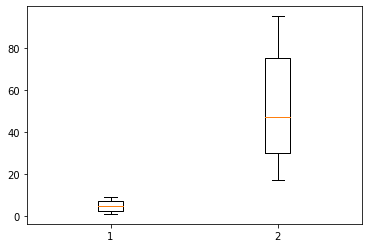

In [12]:
plt.boxplot(data)

<big><b>SCATTER PLOT</b></big>

<b><big><p>Scatter plot indicates the chance of high scoring with positive Linear relationship</p></big></b>

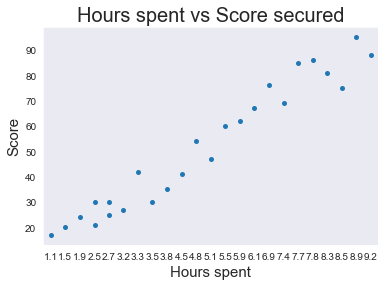

In [14]:
#plotting the Scatter plot to visual the data
sns.set_style('dark')
sns.stripplot(x=data['Hours'], y=data['Scores'])
plt.title('Hours spent vs Score secured',fontsize = 20)
plt.xlabel('Hours spent',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.show()

<big><b> REGRESSION PLOT</b></big>

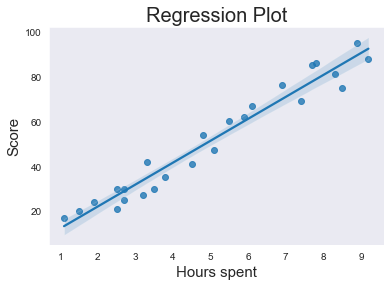

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
#plotting the Regression plot plot to visual the data
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Score', size=15)
plt.xlabel('Hours spent', size=15)
plt.show()
print(data.corr())

# Training the model


In [16]:
#importing the libraries to get the dataset
from sklearn.model_selection import train_test_split

<big><b>SPLITTING THE DATA</b>

In [17]:
# X and y from the Data
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [18]:
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 0)

In [19]:
#splitting the data using PARETo
print("X train.shape =", trainX.shape)
print("Y train.shape =", trainY.shape)
print("X test.shape  =", testX.shape)
print("Y test.shape  =", testY.shape)

X train.shape = (18, 1)
Y train.shape = (18,)
X test.shape  = (7, 1)
Y test.shape  = (7,)


In [20]:
#fitting the data into model
from sklearn.linear_model import LinearRegression

<big><b>FITTING THE DATA</b>

In [21]:
LReg = LinearRegression()

In [22]:
LReg.fit(trainX,trainY)
print("Data got fit")

Data got fit


In [23]:
print("X1 =",LReg.intercept_,"\nX2 =",LReg.coef_)
# X1 is Intercept & Slope of the line is X2.

X1 = 1.932204253151646 
X2 = [9.94167834]


In [26]:
Y1 = LReg.intercept_ + LReg.coef_*trainX

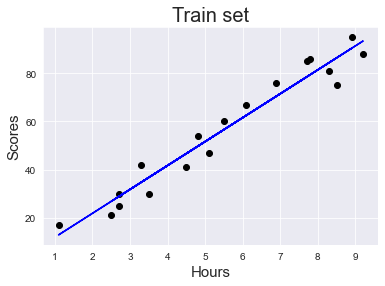

In [27]:
#plotting the graph
sns.set_style('darkgrid')
plt.scatter(trainX,trainY,color='black')
plt.title("Train set",fontsize=20)
plt.plot(trainX,Y1,color='blue')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

# Testing the model

In [28]:
#Test data scores
predictindOFy = LReg.predict(testX)
prediction = pd.DataFrame({'Hours': [i[0] for i in testX], 'Predicted Marks': [k for k in predictindOFy]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


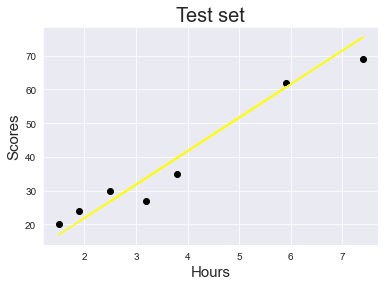

In [29]:
#plotting the graph
sns.set_style('darkgrid')
plt.plot(testX,predictindOFy,color ='yellow')
plt.scatter(testX,testY,color='black')
plt.title("Test set",fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

In [30]:
compare_scores = pd.DataFrame({'Actual Marks': testY, 'Predicted Marks': predictindOFy})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<b><big><p>ACCURACY</p></big></b>

In [31]:
from sklearn import metrics

In [32]:
metrics.r2_score(testY,predictindOFy)

0.9367661043365055

<b><big><p>The Accuracy of the model is 93.67 which is a GOOD MODEL</p></big></b>

# Error prediction by evaluating the model

In [35]:
#error prediction
from sklearn.metrics import mean_squared_error

In [36]:
meanSquareError = metrics.mean_squared_error(testY,predictindOFy)
print("Mean Squared Error is= ",meanSquareError)

Mean Squared Error is=  20.33292367497997


<b>The chance of error occuring is stated by Mean Absolute Error</b>

# Score Prediction

<span><h3><b>What will be the predicted score of a student if he/she studies for 9.25 hrs/day?</b>

In [37]:
score = LReg.predict([[9.25]])
print("predicted score if a student studies 9.25 hours per day :",score)

predicted score if a student studies 9.25 hours per day : [93.89272889]


<big><b>The regression model predicted the if a student studies for 9.25 hrs/day then he/she is likely to score <u>  <span>93.89</span></u> percent marks</b></big>